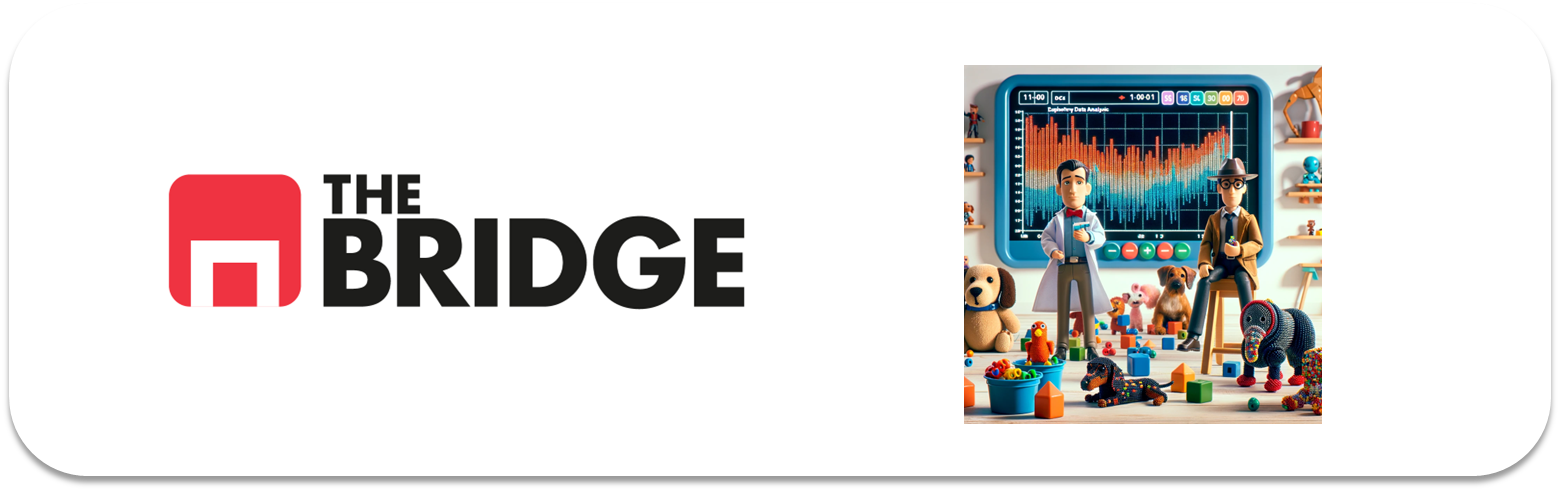

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, \
plot_categorical_numerical_relationship, plot_combined_graphs, plot_grouped_boxplots, plot_grouped_histograms, grafico_dispersion_con_correlacion, bubble_plot

from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu
from scipy import stats

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df = pd.read_csv("./data/titanic.csv")
df.head(5)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df = df.drop(columns = ["deck", "survived", "pclass","embarked"])
df.head(5)

sex   age  sibsp  parch     fare  class    who  adult_male  embark_town  \
0    male  22.0      1      0   7.2500  Third    man        True  Southampton   
1  female  38.0      1      0  71.2833  First  woman       False    Cherbourg   
2  female  26.0      0      0   7.9250  Third  woman       False  Southampton   
3  female  35.0      1      0  53.1000  First  woman       False  Southampton   
4    male  35.0      0      0   8.0500  Third    man        True  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df["family_members"] = df.parch + df.sibsp
df

sex   age  sibsp  parch     fare   class    who  adult_male  \
0      male  22.0      1      0   7.2500   Third    man        True   
1    female  38.0      1      0  71.2833   First  woman       False   
2    female  26.0      0      0   7.9250   Third  woman       False   
3    female  35.0      1      0  53.1000   First  woman       False   
4      male  35.0      0      0   8.0500   Third    man        True   
..      ...   ...    ...    ...      ...     ...    ...         ...   
886    male  27.0      0      0  13.0000  Second    man        True   
887  female  19.0      0      0  30.0000   First  woman       False   
888  female   NaN      1      2  23.4500   Third  woman       False   
889    male  26.0      0      0  30.0000   First    man        True   
890    male  32.0      0      0   7.7500   Third    man        True   

     embark_town alive  alone  family_members  
0    Southampton    no  False               1  
1      Cherbourg   yes  False               1  
2    Southampton   yes   True               0  
3    Southampton   yes  False               1  
4    Southampton    no   True               0  
..           ...   ...    ...             ...  
886  Southampton    no   True               0  
887  Southampton   yes   True               0  
888  Southampton    no  False               3  
889    Cherbourg   yes   True               0  
890   Queenstown    no   True               0  

[891 rows x 12 columns]

In [6]:
df = df.drop(columns = ["parch", "sibsp"])
df

sex   age     fare   class    who  adult_male  embark_town alive  \
0      male  22.0   7.2500   Third    man        True  Southampton    no   
1    female  38.0  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.0   7.9250   Third  woman       False  Southampton   yes   
3    female  35.0  53.1000   First  woman       False  Southampton   yes   
4      male  35.0   8.0500   Third    man        True  Southampton    no   
..      ...   ...      ...     ...    ...         ...          ...   ...   
886    male  27.0  13.0000  Second    man        True  Southampton    no   
887  female  19.0  30.0000   First  woman       False  Southampton   yes   
888  female   NaN  23.4500   Third  woman       False  Southampton    no   
889    male  26.0  30.0000   First    man        True    Cherbourg   yes   
890    male  32.0   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  
2     True               0  
3    False               1  
4     True               0  
..     ...             ...  
886   True               0  
887   True               0  
888  False               3  
889   True               0  
890   True               0  

[891 rows x 10 columns]

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
df.embark_town.value_counts(dropna = False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [8]:
df[df.embark_town.isna()]

sex   age  fare  class    who  adult_male embark_town alive  alone  \
61   female  38.0  80.0  First  woman       False         NaN   yes   True   
829  female  62.0  80.0  First  woman       False         NaN   yes   True   

     family_members  
61                0  
829               0

In [9]:
df.loc[df.embark_town.isna(),"embark_town"] = df.embark_town.mode()[0]
df[df.embark_town.isna()]

Empty DataFrame
Columns: [sex, age, fare, class, who, adult_male, embark_town, alive, alone, family_members]
Index: []

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:
df.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [11]:
mean_man = df.loc[df.who == "man","age"].mean()
mean_woman = df.loc[df.who == "woman","age"].mean()
mean_child = df.loc[df.who == "child","age"].mean()
print(mean_man,mean_woman,mean_child)

33.17312348668281 32.0 6.369518072289156


In [12]:
df.loc[(df.age.isna()) & (df.who == "man"), "age"] = mean_man
df.loc[(df.age.isna()) & (df.who == "woman"), "age"] = mean_woman
df.loc[(df.age.isna()) & (df.who == "child"), "age"] = mean_child

In [13]:
df[(df.age.isna()) & (df.who == "child")]

Empty DataFrame
Columns: [sex, age, fare, class, who, adult_male, embark_town, alive, alone, family_members]
Index: []

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [14]:
df_titanic = df

In [15]:
df_titanic.columns.to_list()

['sex',
 'age',
 'fare',
 'class',
 'who',
 'adult_male',
 'embark_town',
 'alive',
 'alone',
 'family_members']

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?  

**respuesta:**  
En terminos absolutos sobrevivieron mas mujeres, le siguen los hombres y luego los niños.  
En terminos relativos sobrevivieron mas mujeres, le siguen los niños y finalmente los hombres.  

Sí que existe una relación estadísticamente significativa entre el sexo y la supervivencia (p-value mucho menor que 0.05 con el test chi-2).  
Mientras que las mujeres sobrevivieron un 74 %, los hombres solo sobrevivieron un 19%.  

Tambien existe una relación estadísticamente significativa (p-value mucho menor que 0.05) entre la supervivencia y ser hombre adulto, mujer adulta o ser niño .
Mientras que las mujeres adultas tienen la tasa mas alta de superviviencia (76%), los niños tienen una de 59% y los hombres una tasa mucho mas baja (16%). Por lo tanto, la probabilidad mas baja de sobrevivir de toda la poblacion lo tienen claramente los hombres adultos.  
Sería interesante estudiar porque las mujeres tienen una tasa de supervivencia mas alta que los niños(as). Podríamos estudiar si hay un discriminacion en los niños de sexo masculino que hace empeorar la tasa.  


3. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

**respuesta**
En terminos absolutos sobrevivieron mas pasajeros de la primera clase (136), le sigue tercera clase (119) y finalmente segunda clase (87).  
En terminos relativos sobrevieron mas pasajeros de primera clase (63%), seguidos de segunda clase (47%) y tercera clase (24%).  
Claramente hay una discriminacion de los pasajeros de tercera clase que eran un 55% del total de pasajeros.  

Sí que existe una relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia (p-value mucho menor que 0.05).

5. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

**respuesta:**  
En terminos absolutos sobrevivieron mas pasajeros de Southampton (219), seguidos de Cherbourg (93) y Queenstown (30).  
En terminos relativos sobrevivieron mas pasajeros de Cherbourg (55%), seguidos de Queenstown (39%) y Southampton (34%).  
Claramente las personas de Southampton son las que presentan menos probabilidad de supervivencia (34%) a pesar de que en terminos absolutos fueron los que mas sobrevivieron (219).  

Sí que existe una relación estadísticamente significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido (p-value mucho menor que 0.05 con el test de U de Mann-Whitney).

7. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

**respuesta:**  
Se observa en la grafica que del grupo que sobrevivió la mediana de fare está mas desplazada hacia la derecha.   
Por lo que se observa una relacion entre el precio del pasaje y la supervivencia/fallecimiento.Siendo los que más pagaron los que tienen más posibilidad de supervivencia.
   

9. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?  

**respuesta:**  
Sí que existen 15 pasajeros que no pagaron el billete, es decir, tienen un fare de cero. Todos son hombres adultos de Southampton (tanto de primera, segunda y tercera clase) de los que solo sobrevivió uno.  

La persona que más dinero se dejó fue una mujer de 35 años de primera clase, que viajaba sola, que embarcó en Cherbourg, y que sobrevivió.

11. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.  

**respuesta:**  
Sí que existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento.  
AL separar el dataframe entre los que sobrevivieron y los que no, vemos en la funcion de distribucion del fare por ciudad como para los sobrevivientes la mediana está mas hacia la derecha para Cherbourg.  
Es decir que para tener mas probabilidad de sobrevivir tenías que ser de Cherbourg y pagar aprox 56 libras.  
Por el contrario los que tuvieron más probabilidad de fallecer son los de Southampton que pagaron aprox 10 libras.

13. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

**respuesta:**  
Al ver el grafico de la distribucion de la edad por clase vemos que hay una independencia.  
Al ver el grafico de la distribucion de la supervivencia por edad tambien hay una independencia.  
Sin embargo, al observar el grupo de los supervivientes vemos que los de primera clase tienen una mediana de edad desplazada mas a la derecha con repecto a los de segunda y tercera clase.  
Si hicieramos una segmentacion de la edad por niños, adultos y envejecientes veríamos como los envejecientes de primera clase tienen más posibilidad de sobrevivir que los demás pasajeros.

15. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?
Al agrupar por supervivencia o no supervivencia, en los scatterplots no se aprecia ninguna relacion entre edad y fare. Cosa que sí se apreció entre edad y clase social

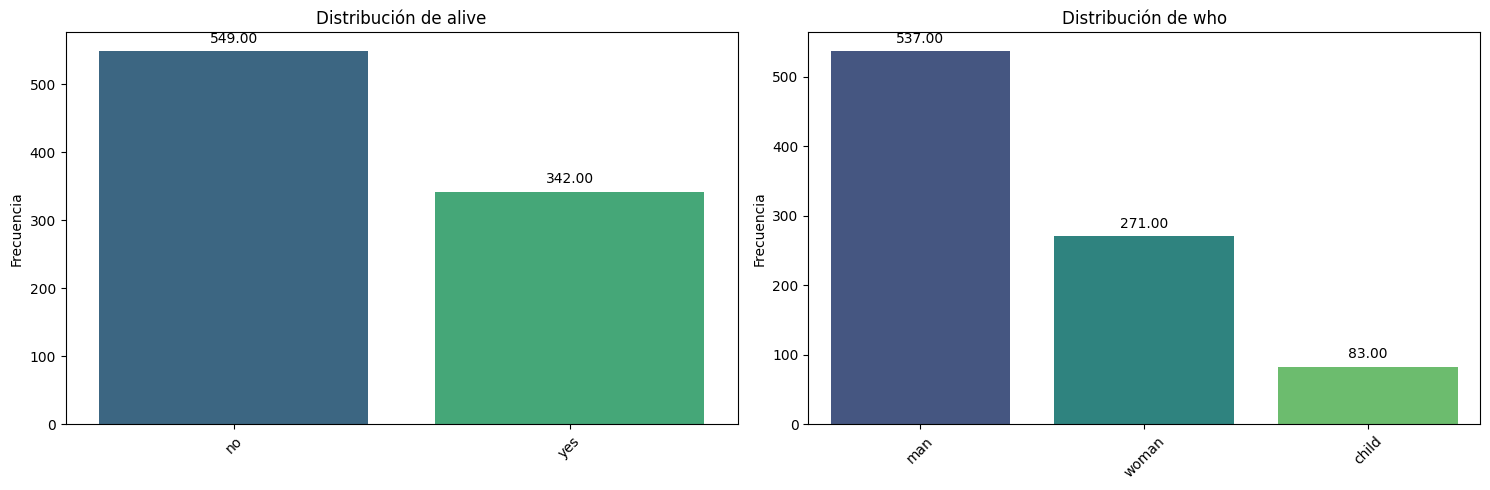

In [16]:
pinta_distribucion_categoricas(df_titanic,["alive","who"], relativa= False, mostrar_valores= True)

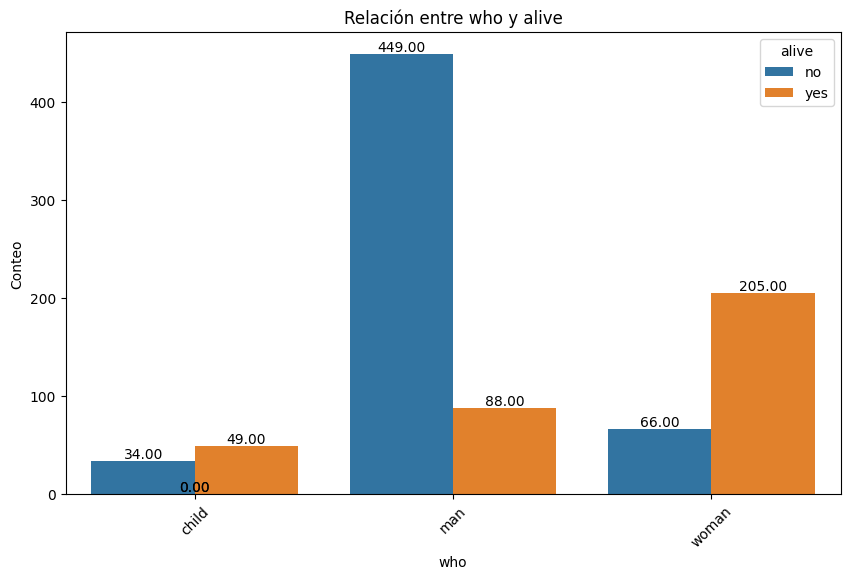

In [17]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = False, show_values = True)

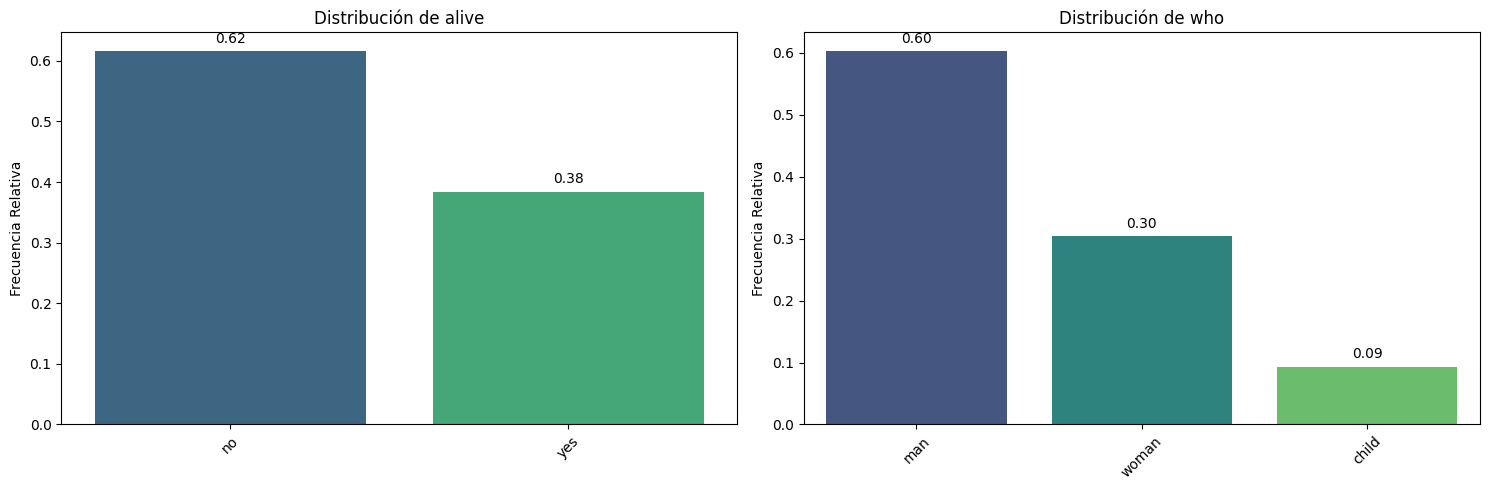

In [18]:
pinta_distribucion_categoricas(df_titanic,["alive","who"], relativa= True, mostrar_valores= True)

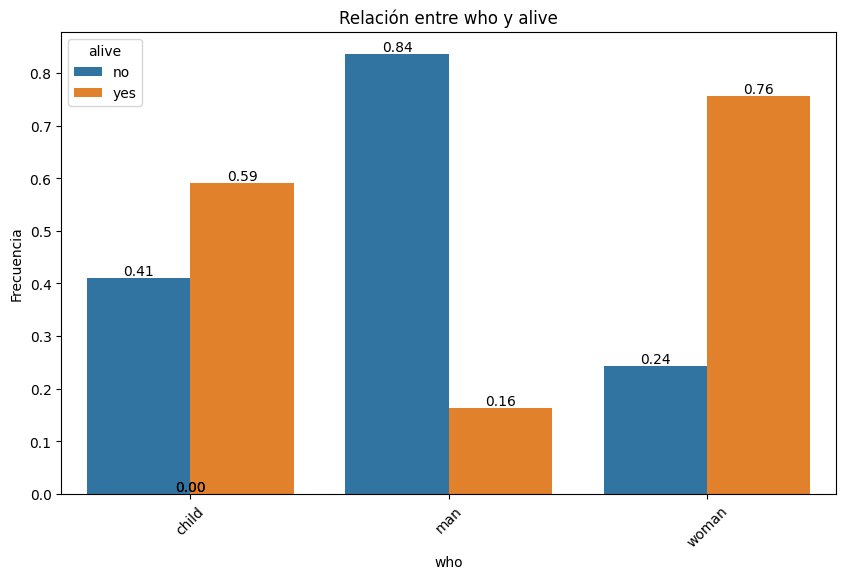

In [19]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values = True)

In [20]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


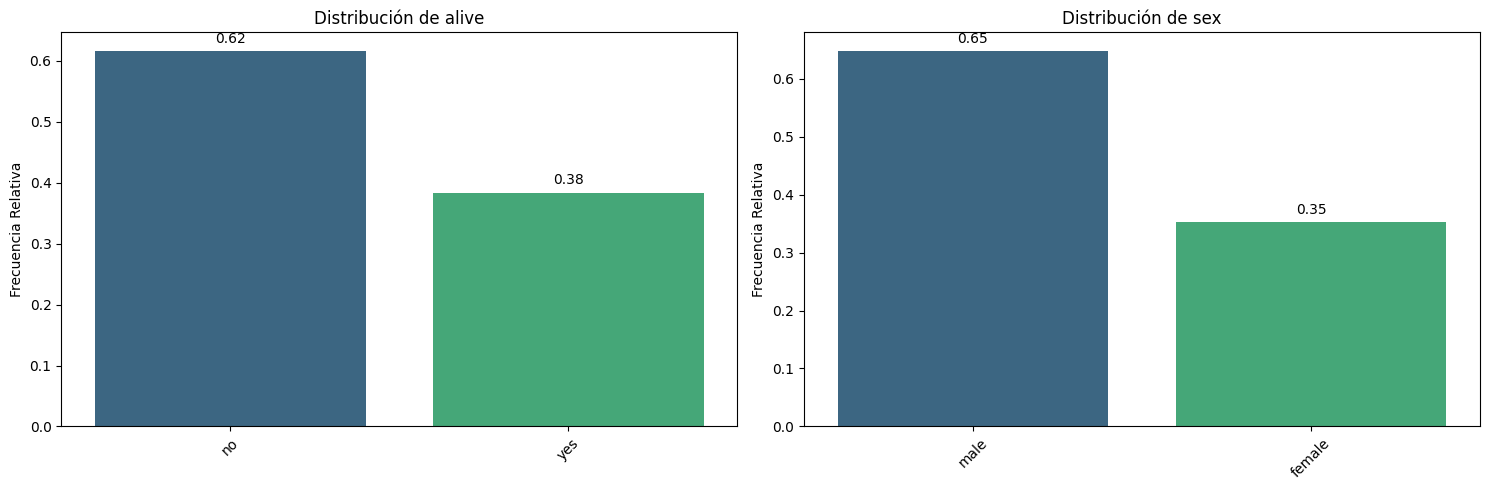

In [21]:
pinta_distribucion_categoricas(df_titanic,["alive","sex"], relativa= True, mostrar_valores= True)

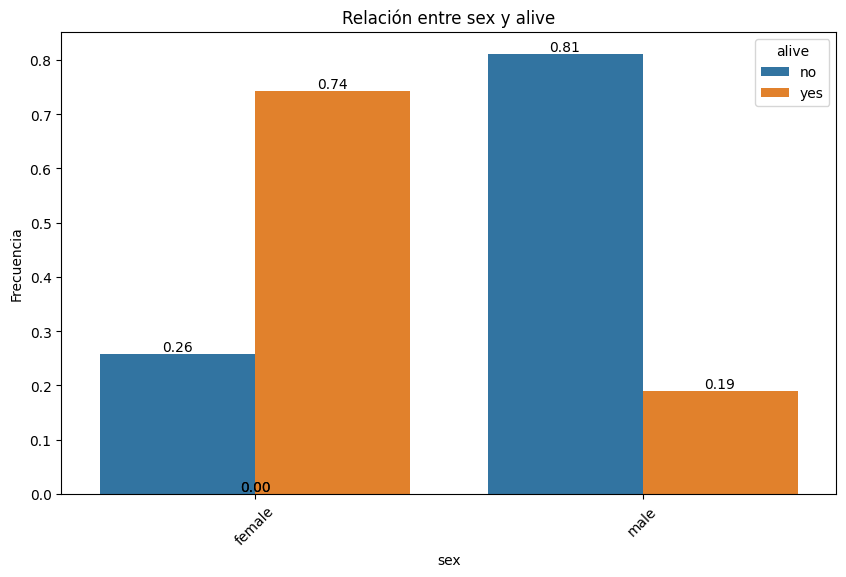

In [22]:
plot_categorical_relationship_fin(df_titanic, "sex","alive", relative_freq = True, show_values = True)

In [23]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['sex'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


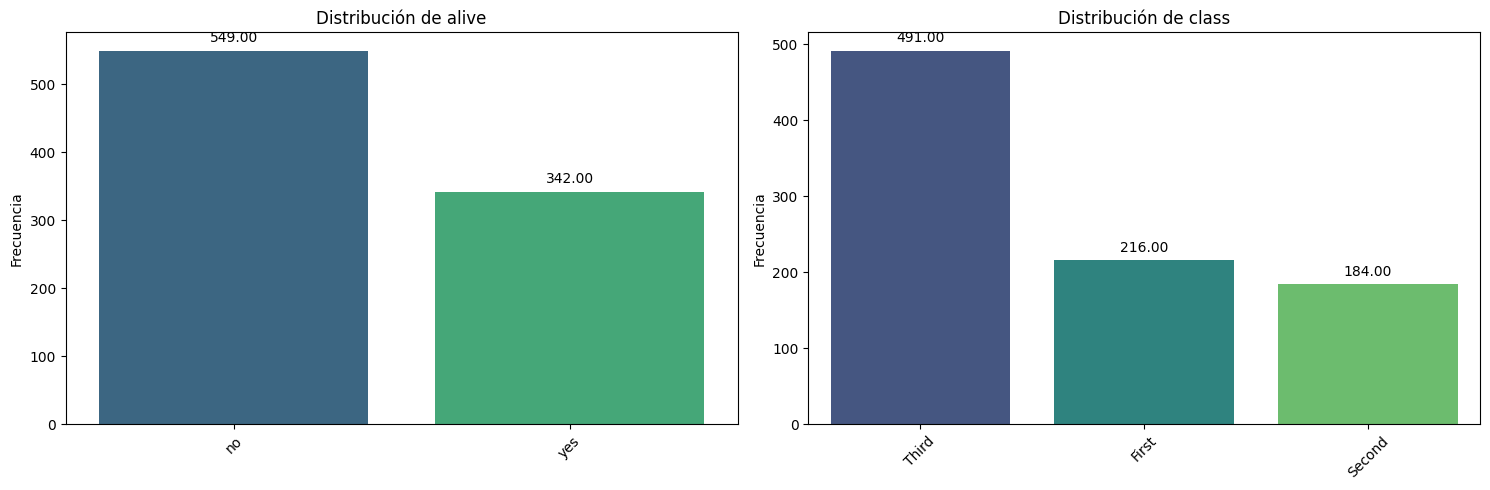

In [24]:
pinta_distribucion_categoricas(df_titanic,["alive","class"], relativa= False, mostrar_valores= True)

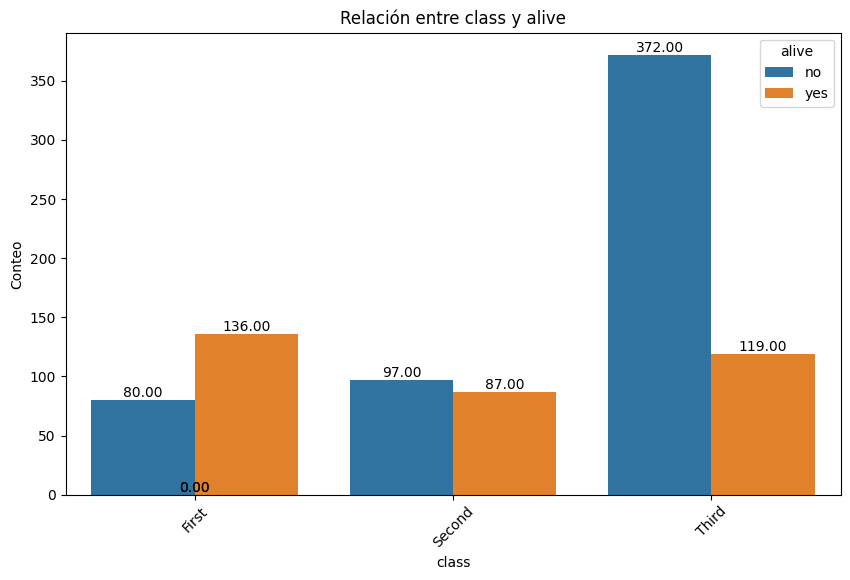

In [25]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq = False, show_values = True)

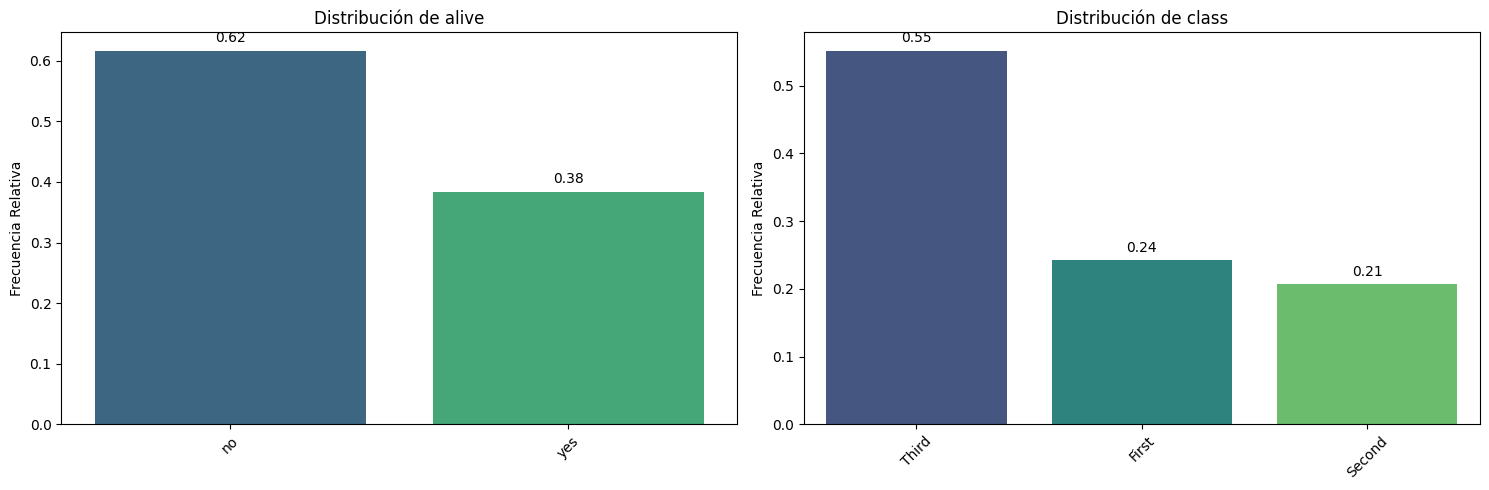

In [26]:
pinta_distribucion_categoricas(df_titanic,["alive","class"], relativa= True, mostrar_valores= True)

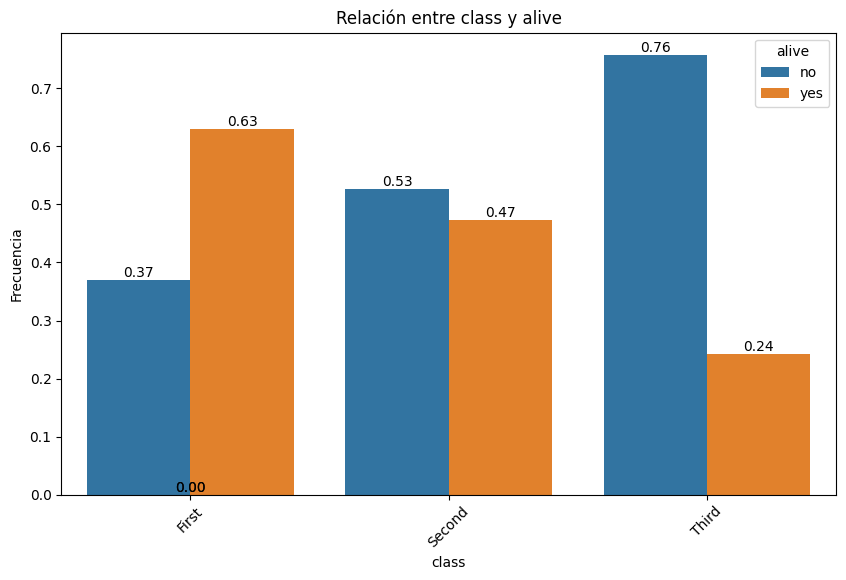

In [27]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq = True, show_values = True)

In [28]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


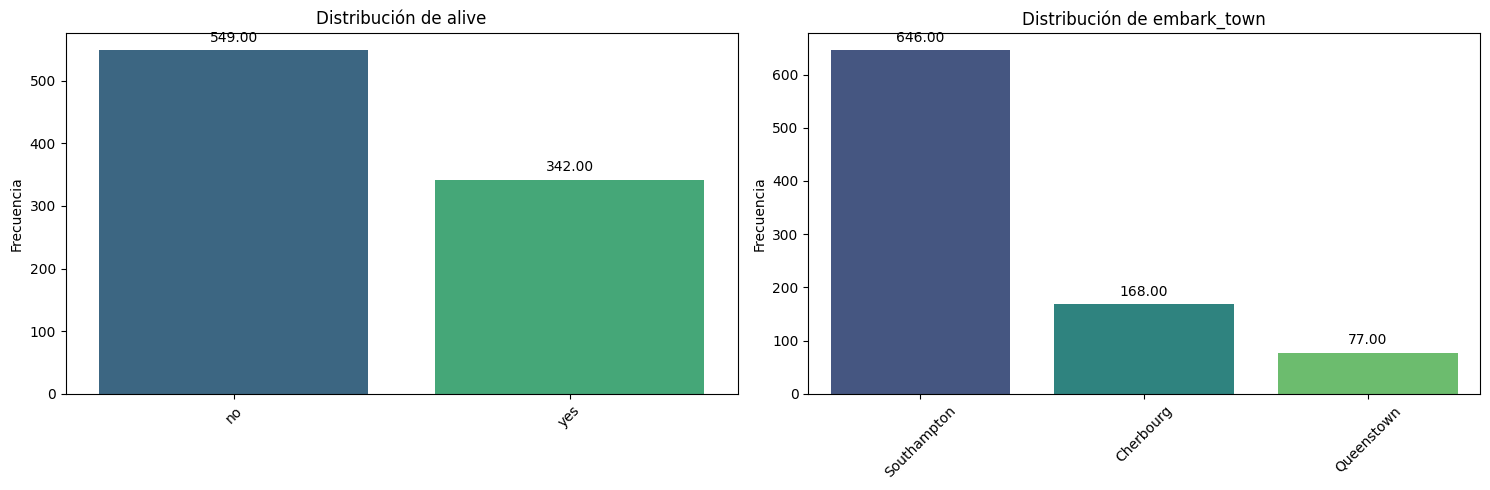

In [29]:
pinta_distribucion_categoricas(df_titanic,["alive","embark_town"], relativa= False, mostrar_valores= True)

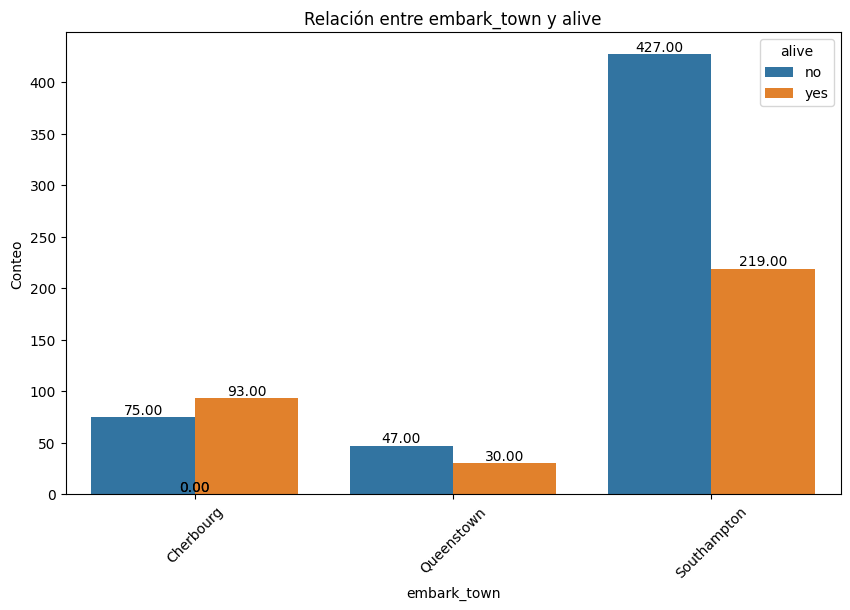

In [30]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq = False, show_values = True)

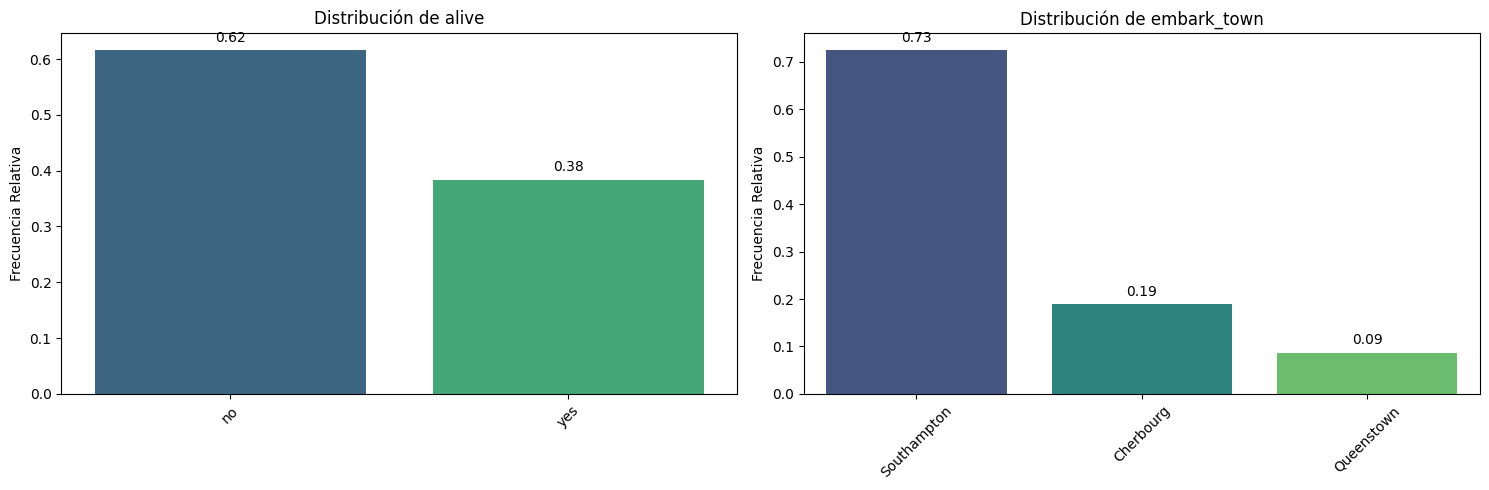

In [31]:
pinta_distribucion_categoricas(df_titanic,["alive","embark_town"], relativa= True, mostrar_valores= True)

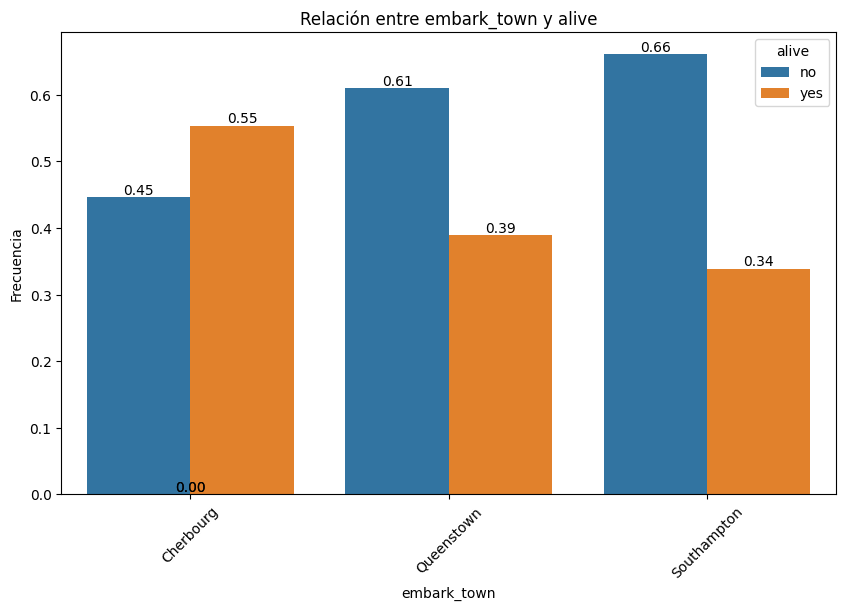

In [32]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq = True, show_values = True)

In [33]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


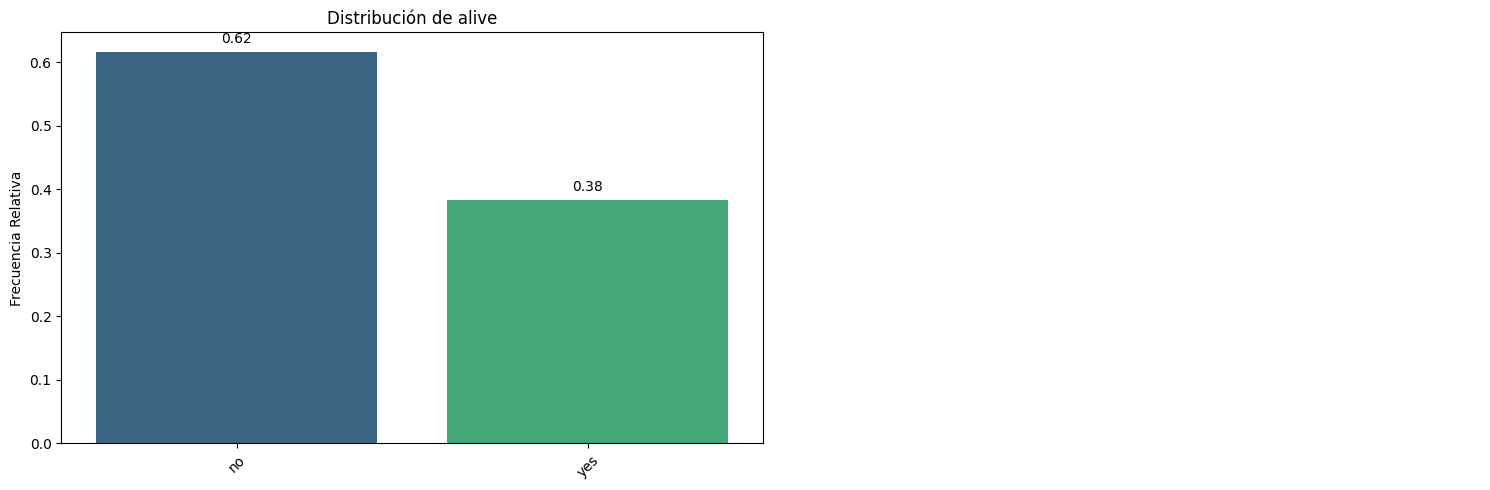

In [34]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores = True)

(2,)


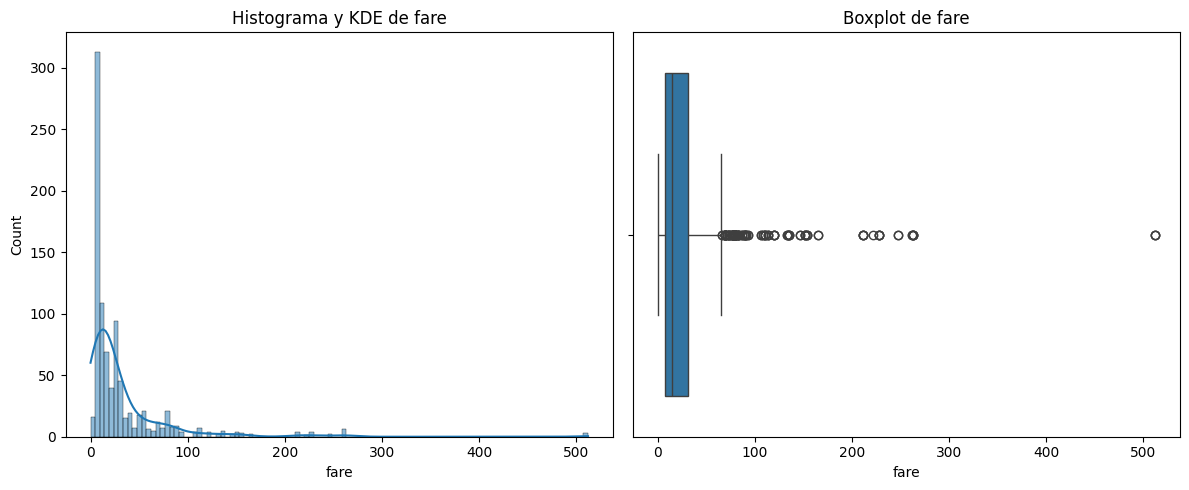

In [35]:
plot_combined_graphs(df_titanic,["fare"])

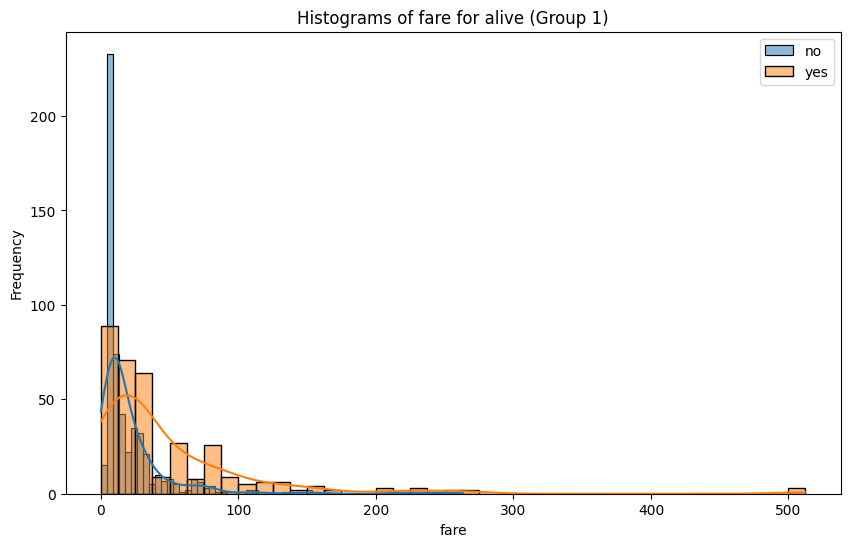

In [36]:
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="fare", group_size= 2)

In [37]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b, method = 'exact')

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 8.860998881441932e-23


In [38]:
(df_titanic.fare == 0).value_counts()

fare
False    876
True      15
Name: count, dtype: int64

In [39]:
df_titanic[(df_titanic.fare == 0)]

sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  Second  man        True  Southampton    no   True   
806  male  39.000000   0.0   First  man        True  Southampton    no   True   
815  male  33.173123   0.0   First  man        True  Southampton    no   True   
822  male  38.000000   0.0   First  man        True  Southampton    no   True   

     family_members  
179               0  
263               0  
271               0  
277               0  
302               0  
413               0  
466               0  
481               0  
597               0  
633               0  
674               0  
732               0  
806               0  
815               0  
822               0

In [40]:
df_titanic.iloc[df_titanic.fare.idxmax()]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

In [41]:
grupo_yes = df_titanic.loc[df_titanic.alive == "yes"]
grupo_no = df_titanic.loc[df_titanic.alive == "no"]

In [42]:
grupo_yes.loc[grupo_yes.embark_town == "Southampton","fare"].describe()

count    219.000000
mean      39.916514
std       45.383008
min        0.000000
25%       12.825000
50%       26.000000
75%       52.277100
max      263.000000
Name: fare, dtype: float64

In [43]:
grupo_yes.loc[grupo_yes.embark_town == "Cherbourg","fare"].describe()

count     93.000000
mean      79.720926
std       99.582717
min        7.225000
25%       19.258300
50%       56.929200
75%       89.104200
max      512.329200
Name: fare, dtype: float64

In [44]:
grupo_yes.loc[grupo_yes.embark_town == "Southampton","fare"].describe()

count    219.000000
mean      39.916514
std       45.383008
min        0.000000
25%       12.825000
50%       26.000000
75%       52.277100
max      263.000000
Name: fare, dtype: float64

In [45]:
grupo_yes.loc[grupo_yes.embark_town == "Queenstown","fare"].describe()

count    30.000000
mean     13.182227
std      15.371167
min       7.733300
25%       7.750000
50%       7.808350
75%      12.350000
max      90.000000
Name: fare, dtype: float64

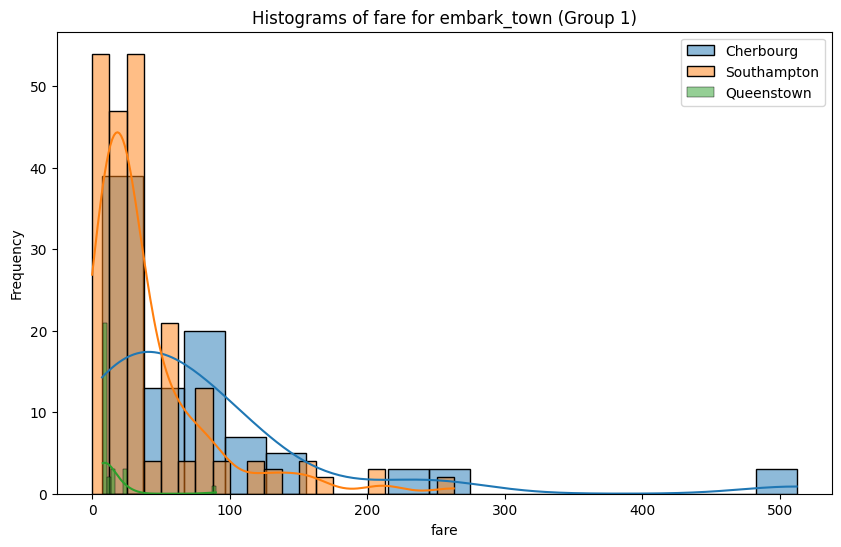

In [46]:
plot_grouped_histograms(grupo_yes, "embark_town","fare",group_size= 3)

In [47]:
grupo_no.loc[grupo_no.embark_town == "Southampton","fare"].describe()

count    427.000000
mean      20.743987
std       27.896824
min        0.000000
25%        7.895800
50%       10.500000
75%       26.000000
max      263.000000
Name: fare, dtype: float64

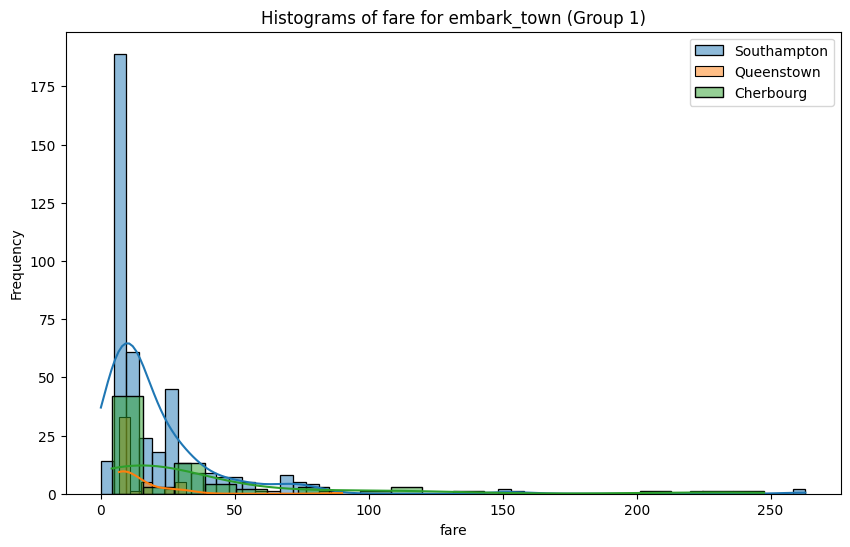

In [48]:
plot_grouped_histograms(grupo_no, "embark_town","fare",group_size= 3)

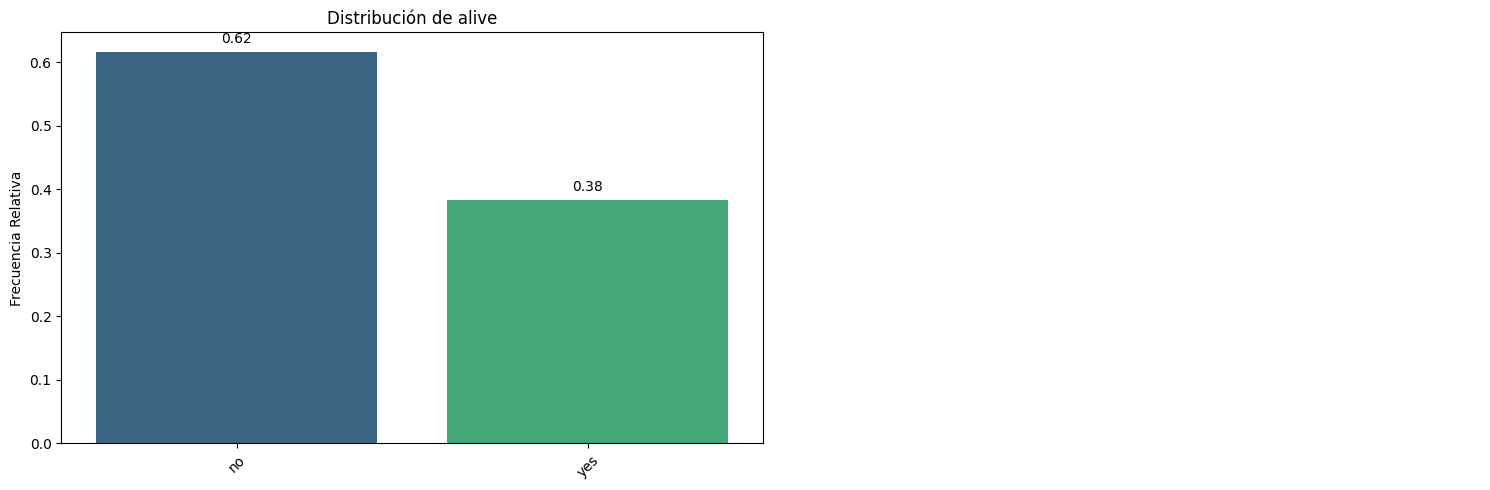

In [49]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores = True)

(2,)


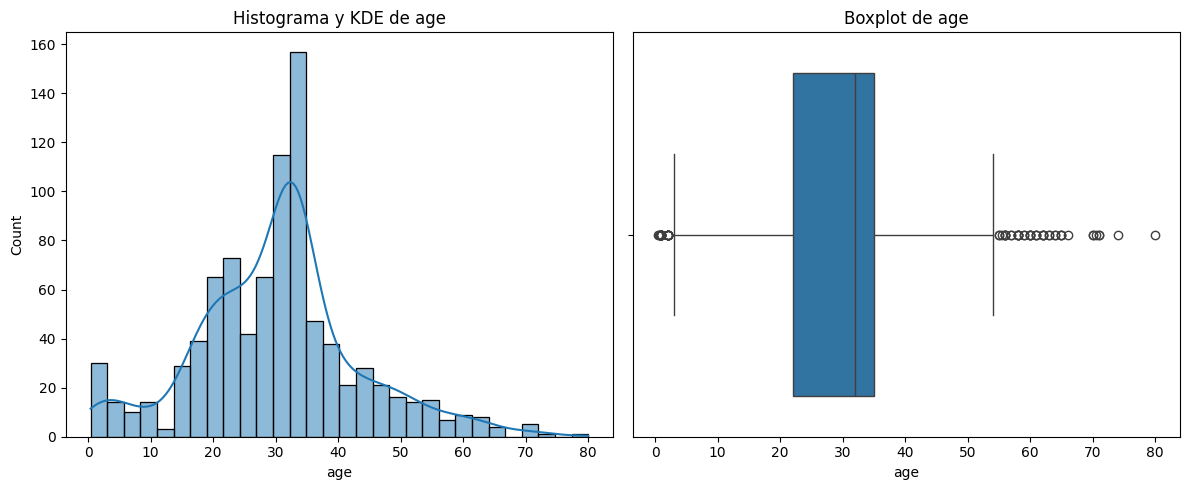

In [50]:
plot_combined_graphs(df_titanic,["age"])

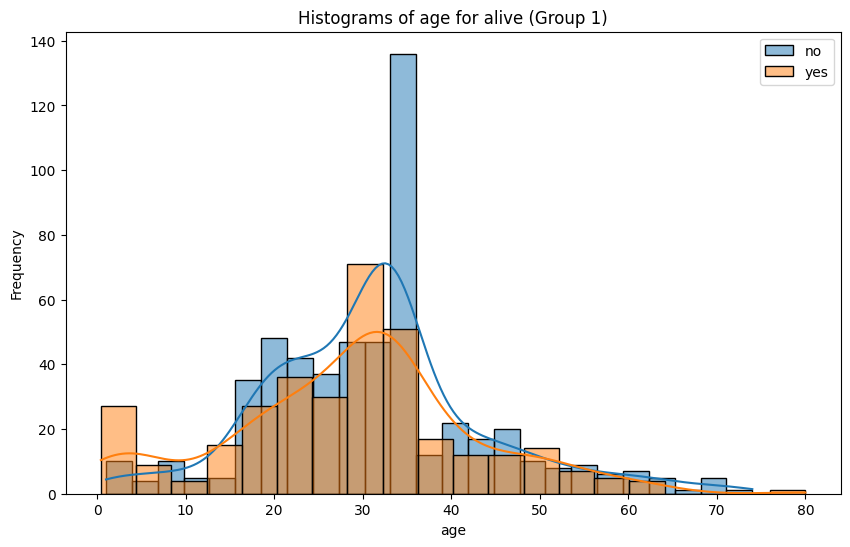

In [51]:
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="age", group_size= 2)

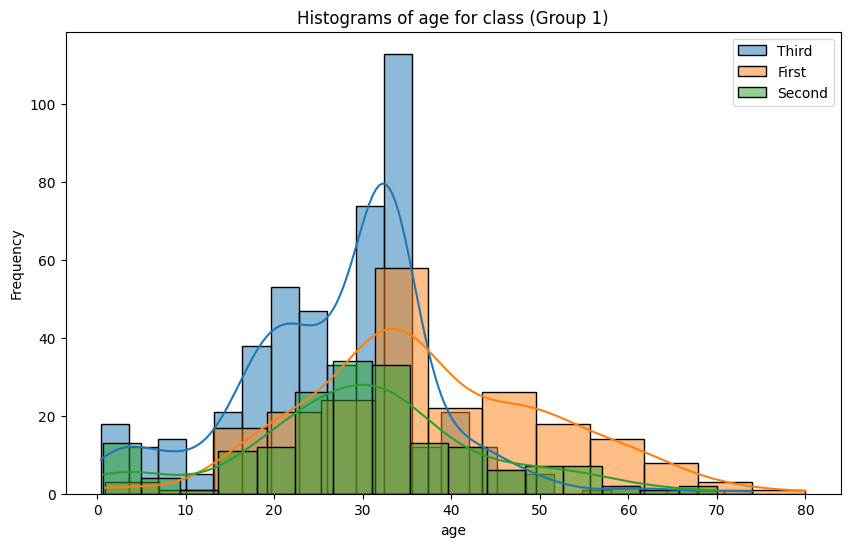

In [52]:
plot_grouped_histograms(df_titanic, cat_col="class",num_col="age", group_size= 3)

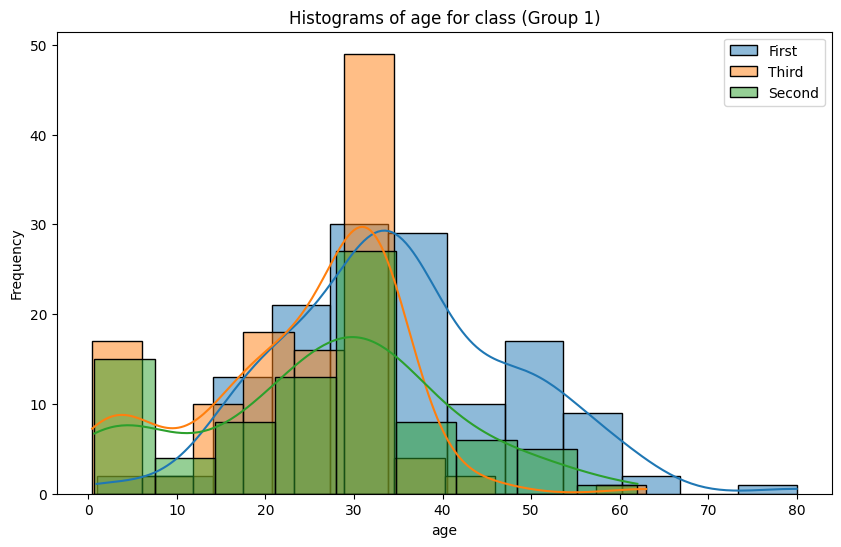

In [53]:
plot_grouped_histograms(grupo_yes, cat_col="class",num_col="age", group_size= 3)

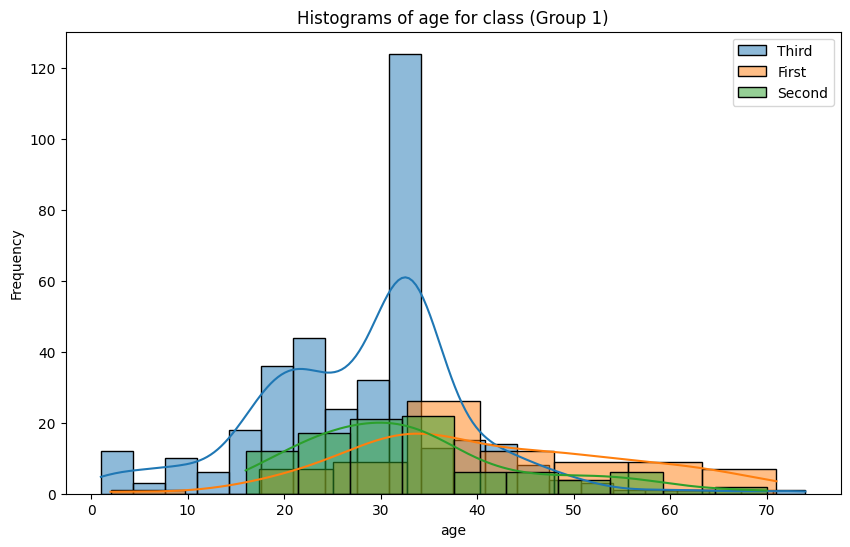

In [54]:
plot_grouped_histograms(grupo_no, cat_col="class",num_col="age", group_size= 3)

In [55]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


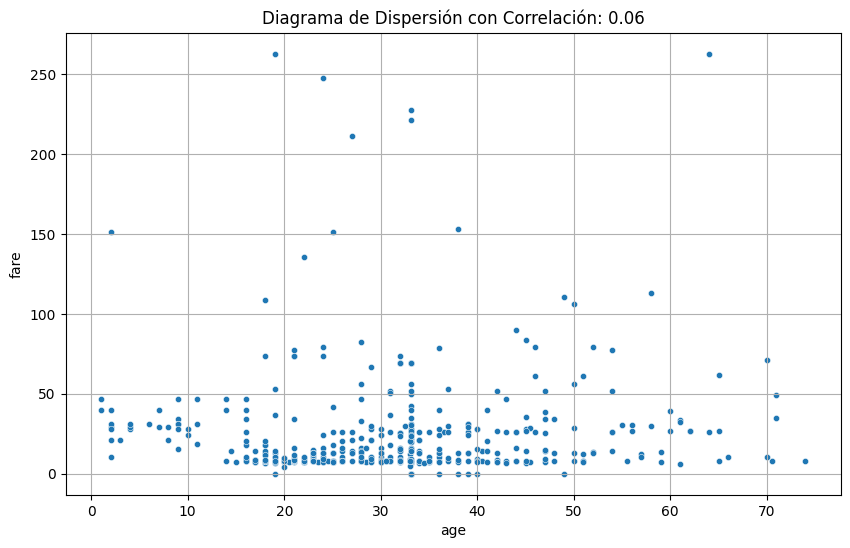

Respuesta yes:


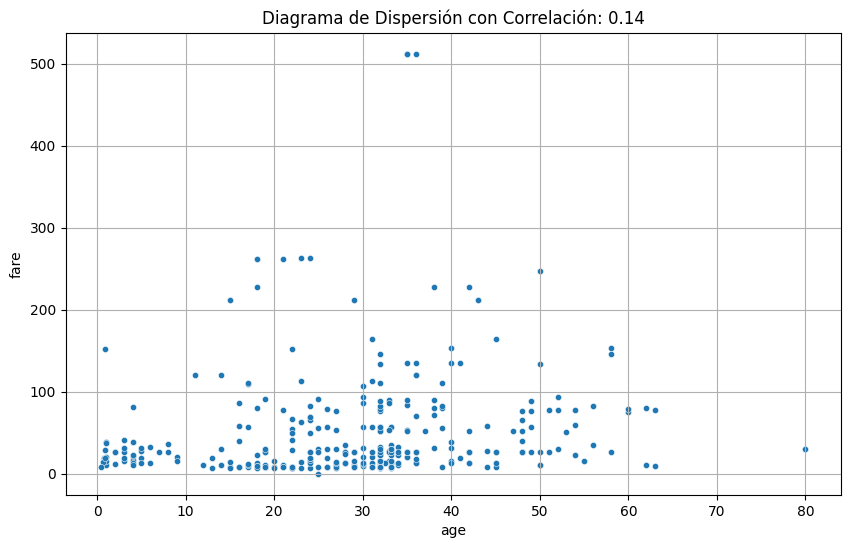

In [56]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)  

Que a pesar de que TabarAir era la que mas vuelos tenía, no es la que más ingresos genera. Y que por el contrario, FlyQ y Airnar que son las que vuelas menos, tienen mas ingresos que TabarAir. La posible explicacion es la eficiencia de los vuelos.  


In [57]:
df_air_jun = pd.read_csv('./data/dataset_viajes_jun23.csv')
df_air_jun.head(10)

aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   
5  MoldaviAir       Cádiz    Melbourne      20029   Boeing 737        True   
6  MoldaviAir       París      Londres        344  Airbus A320       False   
7   PamPangea       París    Melbourne      16925  Airbus A380        True   
8   PamPangea  Nueva York         Bali      16589   Boeing 737        True   
9      Airnar     Ginebra        Cádiz       1725  Airbus A380       False   

      consumo_kg  duracion    ingresos        id_vuelo    mes  
0    1028.691900        51    14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167   468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626   584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503   233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518   438535.07  Tab_CiRo_10747  Jun23  
5   53148.153240      1721   728045.68  Mol_CaMe_10737  Jun23  
6     915.246400        44    13805.52  Mol_PaLo_11320  Jun23  
7  217722.658400      1328  1056735.47  Pam_PaMe_11380  Jun23  
8   45277.618464      1459   600836.96  Pam_NuBa_10737  Jun23  
9   20339.820000       135   110108.07  Air_GiCa_11380  Jun23

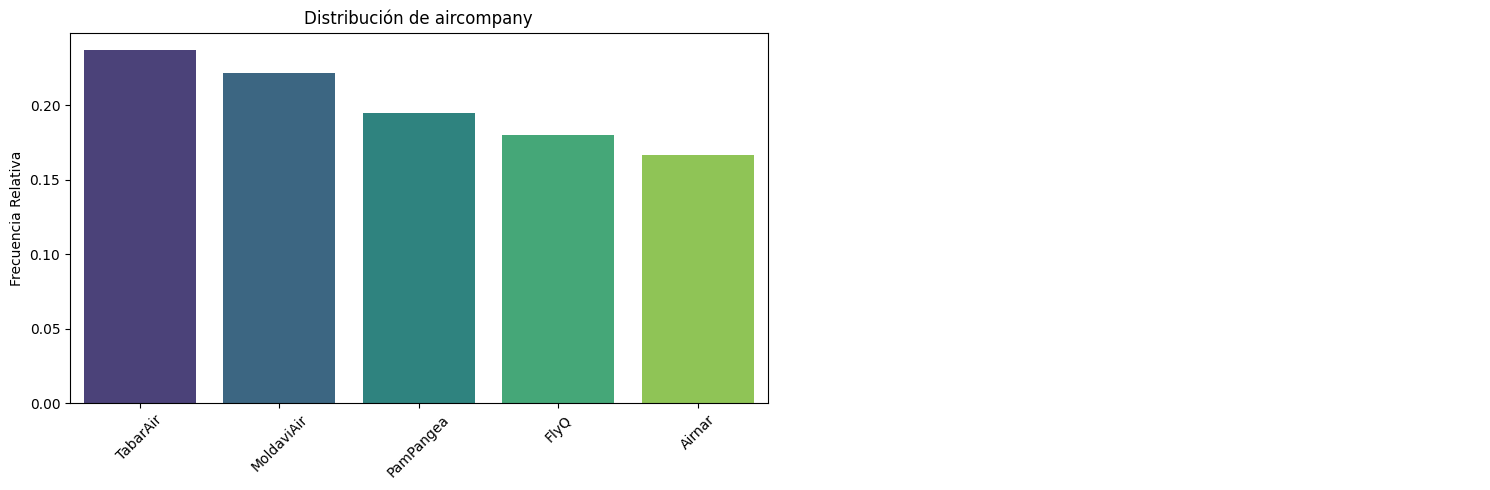

In [58]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

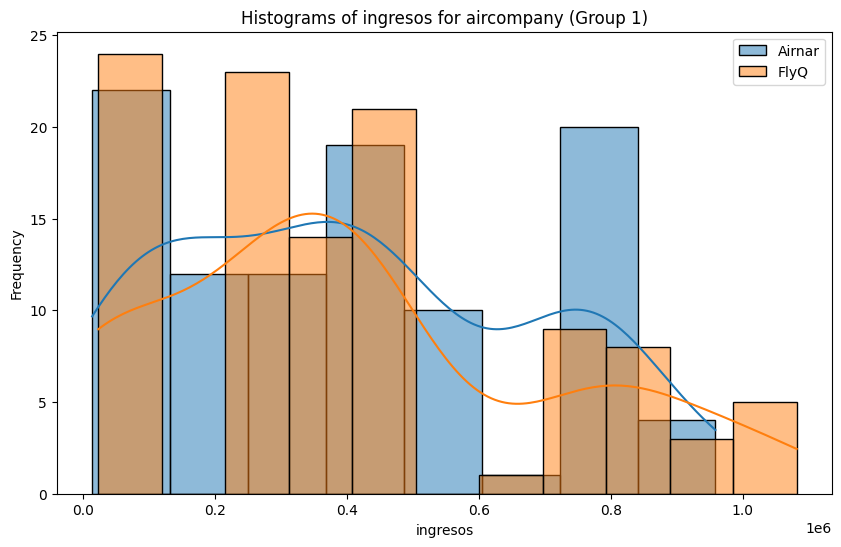

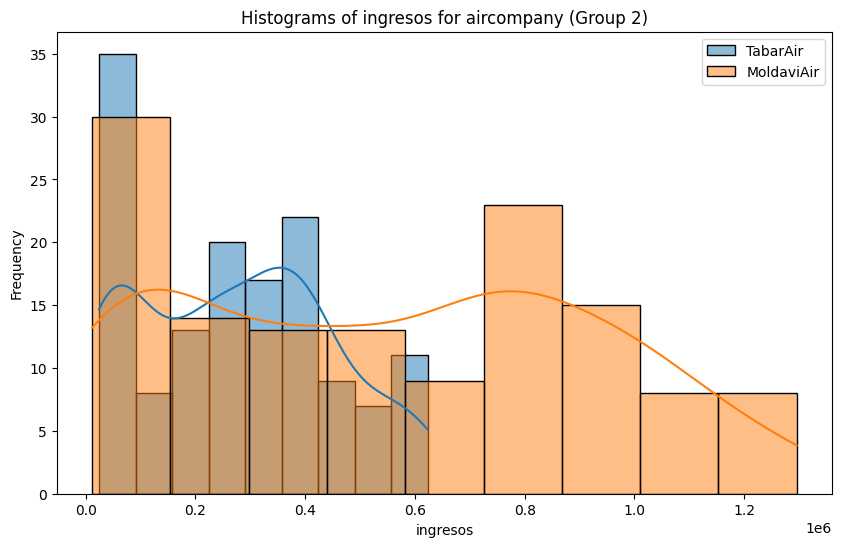

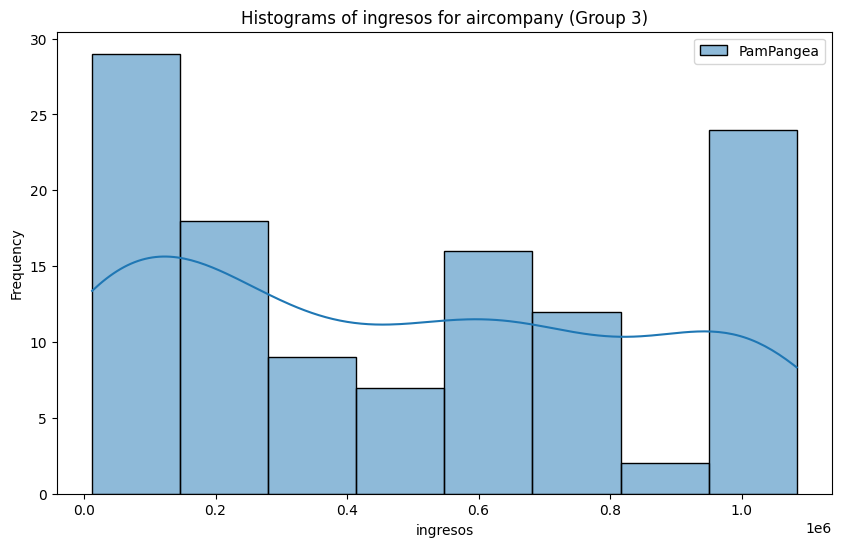

In [59]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


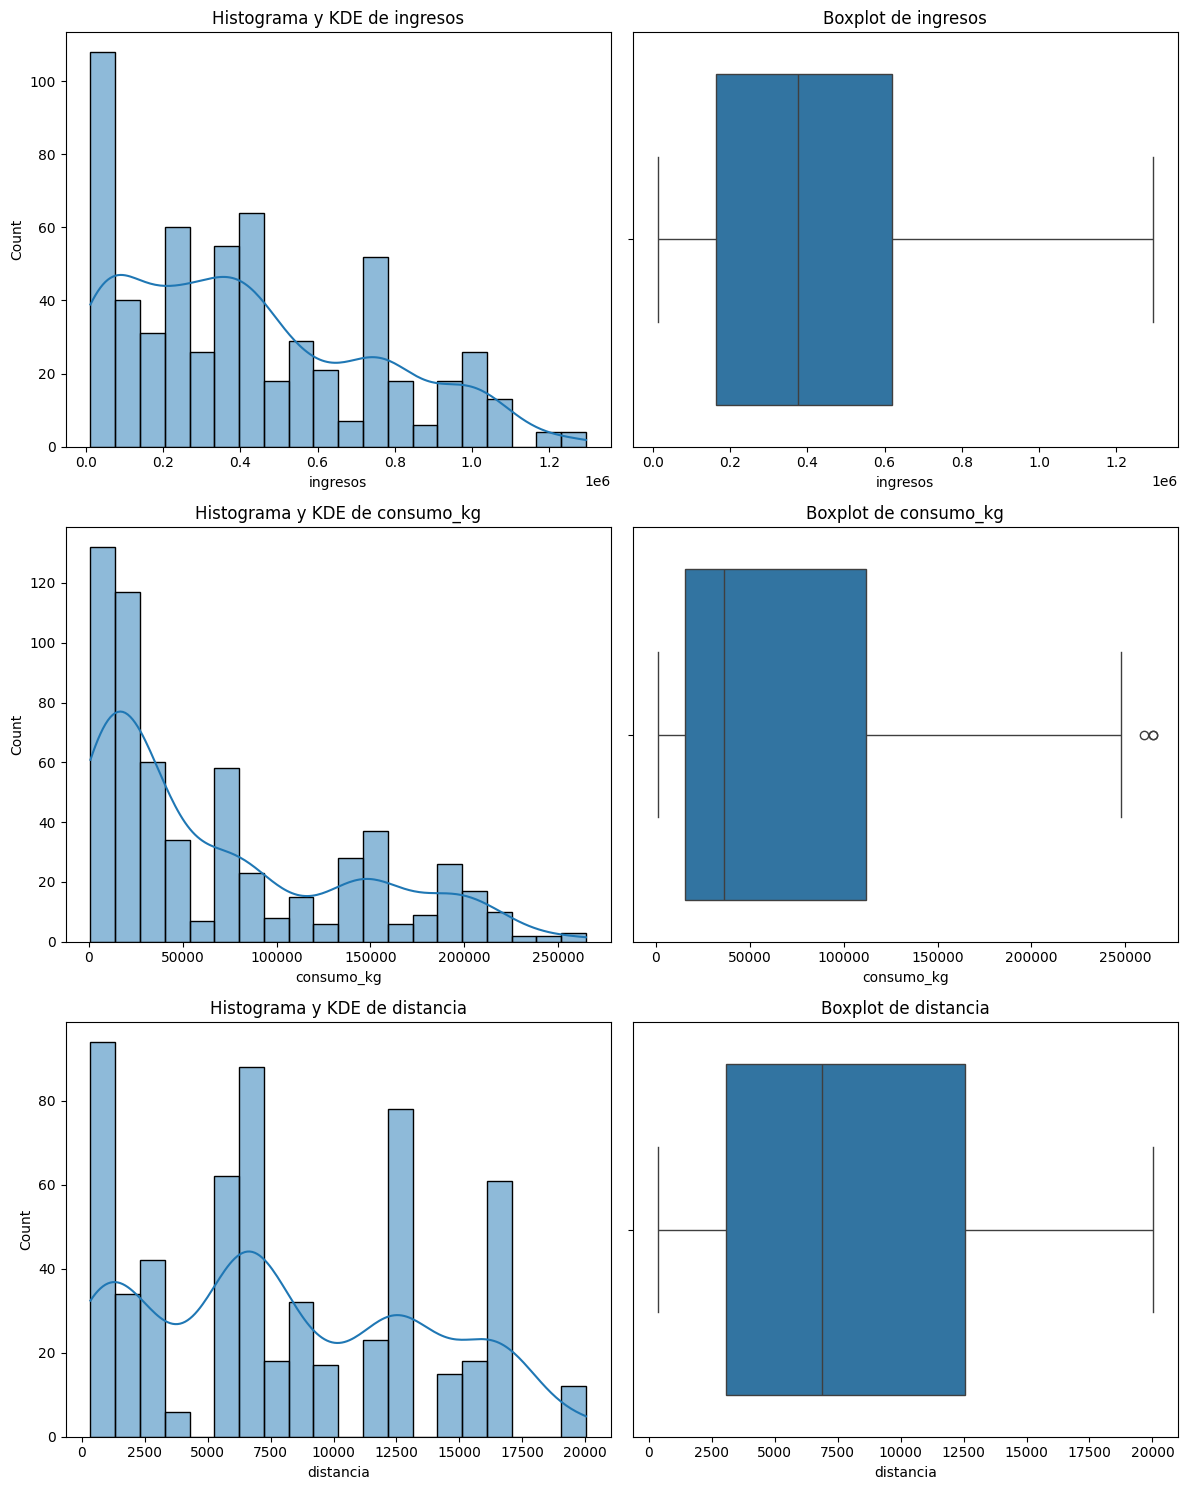

In [60]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"], bins = 20)

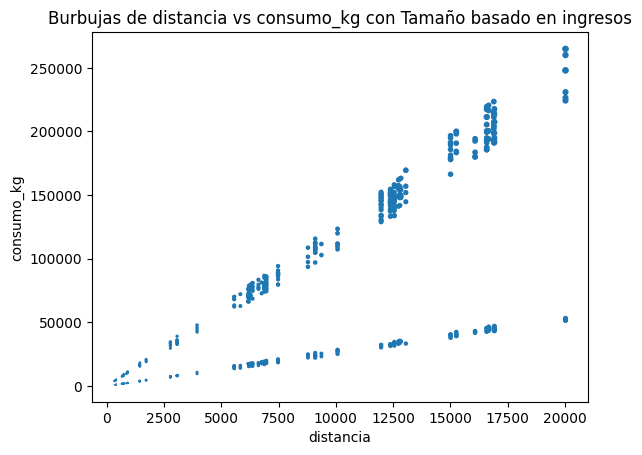

In [61]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

In [62]:
df_air_jun_backup = df_air_jun.copy()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?  

Se observa que en las categorias corta distancia y media distancia hay una agrupacion de vuelos con muy poco consumo y bastantes ingresos.  
Esto se puede apreciar si trazaramos la linea de tendencia y vieramos una pendiente positiva muy pronunciada.  
Mientras que en larga y muy larga distancia, las pendientes son menos pronunciadas, lo que refleja menos eficiencia entre consumo-ingresos.

In [72]:
bins = [0, 5000, 10500, 13500, float('inf')] # Duración en horas 
labels = ['Corto', 'Medio', 'Largo', 'Muy_largo'] 
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels)
df_air_jun

aircompany       origen      destino  distancia        avion  con_escala  \
0        Airnar        París      Ginebra        411   Boeing 737       False   
1          FlyQ         Bali         Roma      12738   Boeing 737        True   
2      TabarAir      Ginebra  Los Angeles       9103  Airbus A380       False   
3    MoldaviAir        París   Cincinnati       6370   Boeing 737       False   
4      TabarAir   Cincinnati         Roma       7480   Boeing 747       False   
..          ...          ...          ...        ...          ...         ...   
595   PamPangea         Bali      Londres      12553   Boeing 737        True   
596      Airnar        Cádiz        París       1447  Airbus A380       False   
597      Airnar  Los Angeles        Cádiz       9373   Boeing 737       False   
598        FlyQ    Barcelona         Bali      13058   Boeing 747        True   
599    TabarAir      Londres   Nueva York       5566   Boeing 747       False   

        consumo_kg  duracion   ingresos        id_vuelo    mes cat_vuelo  
0      1028.691900        51   14232.65  Air_PaGi_10737  Jun23     Corto  
1     33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23     Largo  
2    109439.907200       626  584789.19  Tab_GiLo_11380  Jun23     Medio  
3     17027.010000       503  233342.51  Mol_PaCi_10737  Jun23     Medio  
4     86115.744000       518  438535.07  Tab_CiRo_10747  Jun23     Medio  
..             ...       ...        ...             ...    ...       ...  
595   33310.138680      1153  442668.52  Pam_BaLo_10737  Jun23     Largo  
596   17229.139600       116   87307.63  Air_CaPa_11380  Jun23     Corto  
597   23231.917800       731  339943.47  Air_LoCa_10737  Jun23     Medio  
598  144766.211200      1070  752212.98  Fly_BaBa_10747  Jun23     Largo  
599   62893.573600       391  330320.81  Tab_LoNu_10747  Jun23     Medio  

[600 rows x 12 columns]

In [73]:
df_air_jun.cat_vuelo.value_counts()

cat_vuelo
Medio        217
Corto        176
Muy_largo    106
Largo        101
Name: count, dtype: int64

In [74]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Corto:


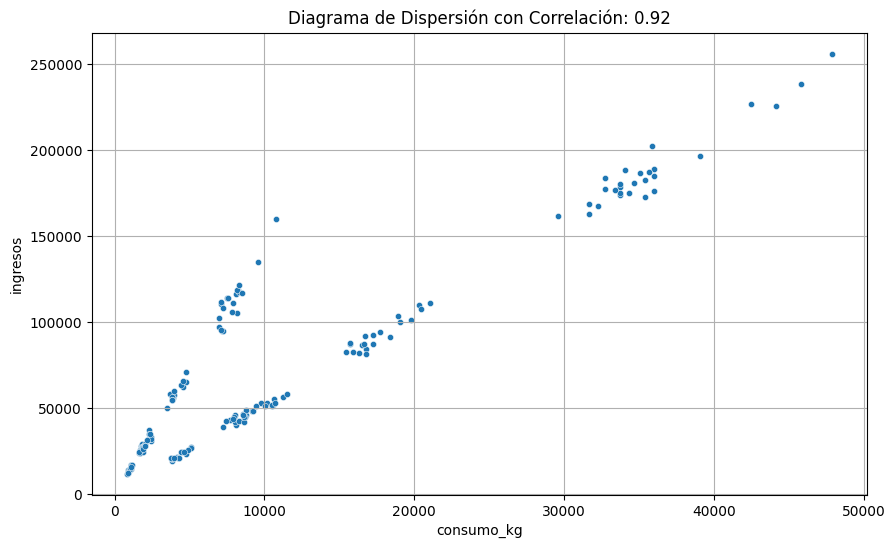

Respuesta Largo:


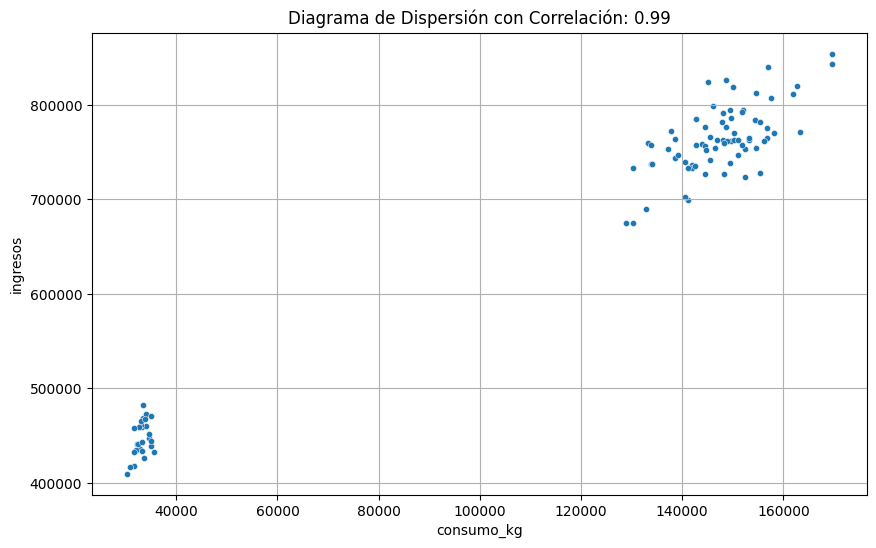

Respuesta Medio:


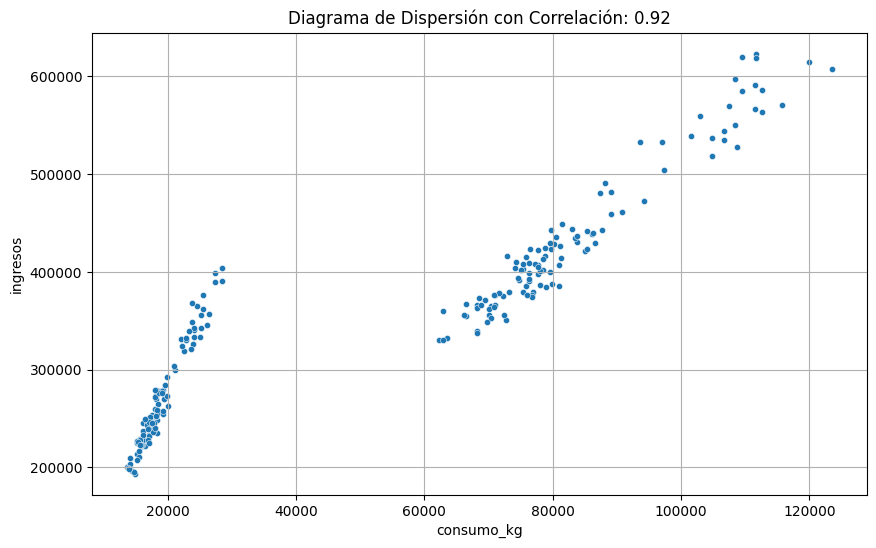

Respuesta Muy_largo:


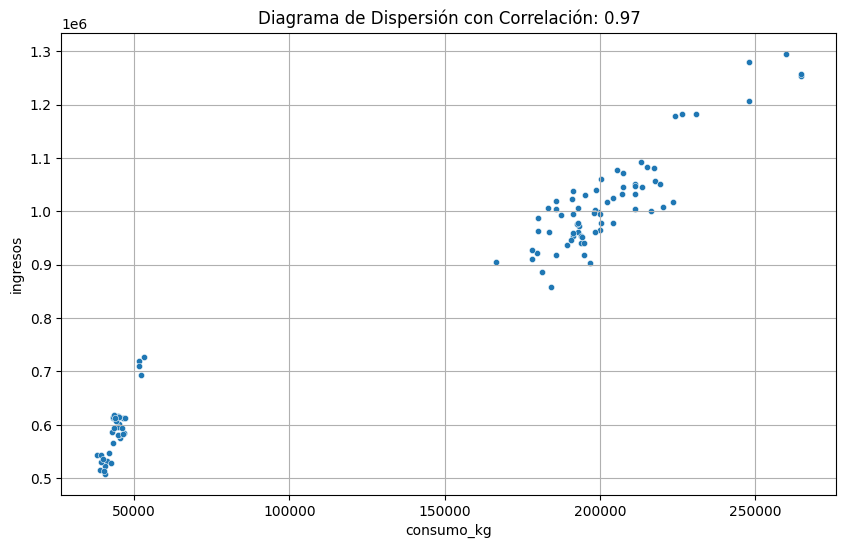

In [75]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.